# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

## Set up environment

The following lines ensure that `numpy` and `pandas` are installed in the notebook environment.  Depending on your system, this may not be necessary and may be removed.

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib

Import the core data science libraries:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [11]:
df = pd.read_csv('./data/2018_Central_Park_Squirrel_Census_Squirrel_Data.csv')

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

__This code shows 5 rows in random__

In [12]:
df.sample(5)

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
826,-73.970025,40.783693,21A-AM-1019-08,21A,AM,10192018,8,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.97002473509 40.7836929044459)
841,-73.964515,40.777257,17I-AM-1014-04,17I,AM,10142018,4,Adult,Gray,"Cinnamon, White",...,False,False,False,False,False,True,True,False,NaN,POINT (-73.9645147011741 40.7772566833799)
1618,-73.975584,40.767024,2F-PM-1014-02,02F,PM,10142018,2,Adult,Gray,NaN,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9755836827968 40.7670239327996)
516,-73.965901,40.779168,18G-PM-1013-02,18G,PM,10132018,2,Adult,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9659010238417 40.779168366621505)
570,-73.967469,40.778973,17E-AM-1017-06,17E,AM,10172018,6,Adult,Gray,NaN,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9674688433583 40.7789728381912)


__This code shows the data types of each column and their names__

In [13]:
df.info()

X                                             float64
Y                                             float64
Unique Squirrel ID                             object
Hectare                                        object
Shift                                          object
Date                                            int64
Hectare Squirrel Number                         int64
Age                                            object
Primary Fur Color                              object
Highlight Fur Color                            object
Combination of Primary and Highlight Color     object
Color notes                                    object
Location                                       object
Above Ground Sighter Measurement               object
Specific Location                              object
Running                                          bool
Chasing                                          bool
Climbing                                         bool
Eating                      

__This code shows how many areas have squirrels that are primary cinnamon color!__

In [17]:
df['Primary Fur Color'].str.count('Cinnamon').sum()

392.0

## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

__I will remove those columns because many rows in those columns are empty__

In [18]:
new_df = df.drop(['Color notes', 'Specific Location', 'Other Activities', 'Other Interactions'], axis=1)

__I will fill the empty cells in column "Above Ground Sighter Measurement" with False__

In [19]:
new_df["Above Ground Sighter Measurement"] = df["Above Ground Sighter Measurement"].fillna('FALSE')

__I will fill the empy cells in column "Hightlight Fur Color" with the value in "Primary Fur Color"__

In [ ]:
new_df['Highlight Fur Color'] = new_df['Highlight Fur Color'].fillna(new_df['Primary Fur Color'])

__I will drop rows with empy cells and rows that have '?' in its age column__

In [20]:
new_df = new_df.dropna()
new_df = new_df[new_df['Age'] != '?']

__Show 5 random rows__

In [10]:
new_df.sample(5)

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Foraging,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Lat/Long
1387,-73.968571,40.774488,12G-PM-1007-07,12G,PM,10072018,7,Juvenile,NaN,NaN,...,False,False,False,False,False,False,False,False,False,POINT (-73.9685709455958 40.7744877026506)
2978,-73.957181,40.793444,35E-AM-1020-02,35E,AM,10202018,2,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,True,False,POINT (-73.9571808775915 40.7934443866725)
606,-73.958968,40.791312,33E-AM-1014-09,33E,AM,10142018,9,Juvenile,Black,NaN,...,False,False,False,False,False,False,False,True,False,POINT (-73.9589675995517 40.7913119223584)
276,-73.978780,40.770753,5A-PM-1010-01,05A,PM,10102018,1,Adult,Gray,White,...,True,False,False,False,False,True,False,False,False,POINT (-73.9787796921165 40.7707526535381)
807,-73.971688,40.778554,15C-PM-1017-02,15C,PM,10172018,2,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,True,POINT (-73.9716881838671 40.778553537087)


## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

In [21]:
new_df.describe()

1847

__1. Shows the age distribution of the squirrels.__

In [22]:
new_df['Age'].value_counts()

3023

__2. Count the Combination of Primary and Highlight Color.__

In [31]:
new_df.groupby('Combination of Primary and Highlight Color')['Combination of Primary and Highlight Color'].count()

Primary Fur Color
Black         29
Cinnamon     317
Gray        1501
Name: Primary Fur Color, dtype: int64

__3. Find the Squirrel behaviors percentage between different color groups__

In [29]:
color_groups = new_df.groupby('Primary Fur Color')
behaviors = ['Running', 'Chasing', 'Climbing', 'Eating', 'Foraging']
behavior_percentages = {}
for color, group in color_groups:
    color_percentages = {}
    for behavior in behaviors:
        color_percentages[behavior] = group[behavior].mean() * 100
    behavior_percentages[color] = color_percentages

print(behavior_percentages)

{'Black': {'Running': 27.586206896551722, 'Chasing': 3.4482758620689653, 'Climbing': 31.03448275862069, 'Eating': 34.48275862068966, 'Foraging': 24.137931034482758}, 'Cinnamon': {'Running': 25.55205047318612, 'Chasing': 7.570977917981073, 'Climbing': 22.082018927444793, 'Eating': 29.02208201892745, 'Foraging': 50.78864353312302}, 'Gray': {'Running': 23.850766155896068, 'Chasing': 8.794137241838774, 'Climbing': 20.45303131245836, 'Eating': 28.181212524983344, 'Foraging': 52.03197868087941}}


__4. Find the top 5 hectares with the highest number of squirrel sightings.__

In [ ]:
hectares = new_df.groupby('Hectare').size().reset_index(name = 'Sightings')

top_hectaures = hectares.sort_values('Sightings', ascending = False).head(5)

print(top_hectaures)

__5. Find the percentage of adult and juvenile squirrels that were sighted above ground.__

In [59]:
above_ground = new_df[new_df['Above Ground Sighter Measurement'] != 'FALSE']

adult = above_ground[above_ground['Age'] == 'Adult'].shape[0]
juvenile = above_ground[above_ground['Age'] == 'Juvenile'].shape[0]
total = adult + juvenile

percent_adult = (adult / total) * 100
percent_juvenile = (juvenile / total) * 100

print(f'Percentage of adult squirrels that were found above ground: {percent_adult:.2f}%')
print(f'Percentage of juvenile squirrels that were found above ground: {percent_juvenile:.2f}%')

627
0
Percentage of adult squirrels that were found above ground: 1.00%
Percentage of juvenile squirrels that were found above ground: 0.00%


## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

__1. This is a bar chart showing the age distribution of the squirrels.__

In [ ]:
age = new_df['Age'].value_counts()

plt.figure(figsize = (10, 10))
age.plot(kind = 'bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

__2. This is a pie chart showing the combination of primary and highlight color distribution.__

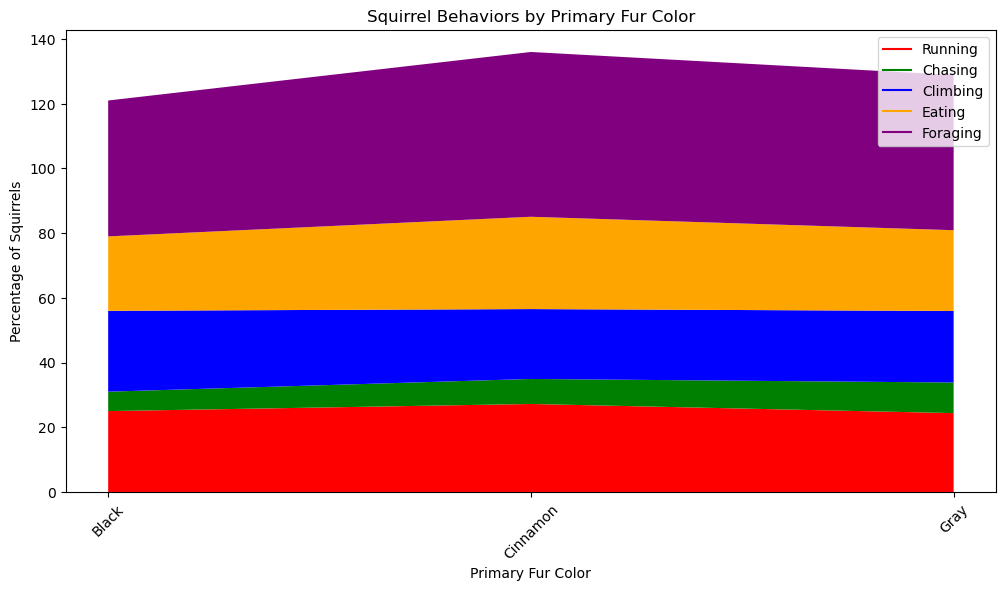

In [72]:
color_counts = new_df['Combination of Primary and Highlight Color'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(color_counts, labels=color_counts.index, autopct='%1.1f%%')
plt.axis('equal') 
plt.show()




__3. This is a line plot showing the number of squirrels sighting in different locations.__

In [ ]:
location_counts = new_df['Location'].value_counts()

# Create a line plot
plt.figure(figsize=(10, 10))
plt.plot(location_counts.index, location_counts.values, marker='o')
plt.xlabel('Location')
plt.ylabel('Number of Squirrels')
plt.xticks(rotation=45)
for ii, count in enumerate(location_counts.values):
    plt.text(ii, count + 0.1, str(count), ha='center')
plt.tight_layout()
plt.show()

__4. This is a bar chart showing the percentage of squirrels performing different action.__

In [ ]:
total = len(new_df)
activities = new_df[['Running', 'Chasing', 'Climbing', 'Eating', 'Foraging']].sum()/total * 100

plt.figure(figsize=(10, 10))
activities.plot(kind = 'bar')
plt.xlabel('Action')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
for ii, percent in enumerate(activities.values):
    plt.text(ii, percent + 0.1, f'{percent:.1f}%', ha = 'center')
plt.show()

__5. This is a pie chart showing the percentage of squirrels sighting in evening of morning__

In [ ]:
shift_counts = new_df['Shift'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(shift_counts, labels=shift_counts.index, autopct='%1.1f%%')
plt.axis('equal') 
plt.show()